<a href="https://colab.research.google.com/github/Loopercool/Data-Detectives/blob/main/Pratham_202101102_Charging_time_removing_null_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation Details: -**

**Problem Statement: - Predicting "Charging time" using regression on EV Charging dataset**

Whole implementation is devided into 3 Major components: -
<br>**1) Data Visualisation**
<br>**2) Data Preprocessing**
<br>**3) Regression analysis**

**1) Data Visualisation**: - Several techniques, including box plots, scatter plots, and heat maps, are used at this phase of implementation to see how the data is distributed.

<br>**2) Data Preprocessing**: - In this part several problems are solved using different inbuilt pandas methods.
<br> **Problems faced & appropriate solution: -** : - 1) Having too much Null values in the dataset(nearly: - 1,00,000)
<br>**sol**: - Removed all Null values from the dataset.
<br>2) Features having format HH:MM:SS, Date.
<br>**sol**: - Changed the values to numeric for data format using custom function, and converted HH:MM:SS to hours.(Note: - Date is having time zone that's why used a custom function to deal with both date + time zone)
<br>3) Reducing Dimentionality: -
<br>**sol**: - Removed several features based on Domain knowledge which contributes very less while predicting target feature.
<br>4) Categorical features.
<br>**sol**: - Used Label encoding to convert categorical data into numeric format.

<br>**3) Regression analysis**: - In this section dataset is devided into training and testing. 5 Models have been selected for regression analysis.
A. Linear Regression, B. SGD Regression, C. Polynomial Regression, D. Random Forest Regeression, E. Gradient Boosting regression.
<br> **Results obtain**: - 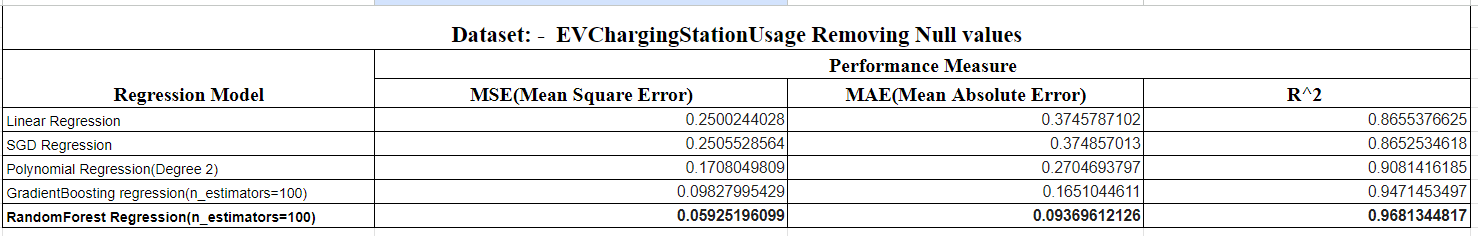

<br> **Observations**: -
As shown in the Table **Random Forest Regression outperforms** all the regression models in terms of every performance measure.

<br>Also used **gridsearch hyperparameter tuning** mathods to train the Linear regression method.
<br> To obtain more accuracy results K Cross fold validation method is also implemented on 4 Regression models namely Linear Regression, Polynomial Regression, SGD regression, and random forest regression.the results are shown in below table. 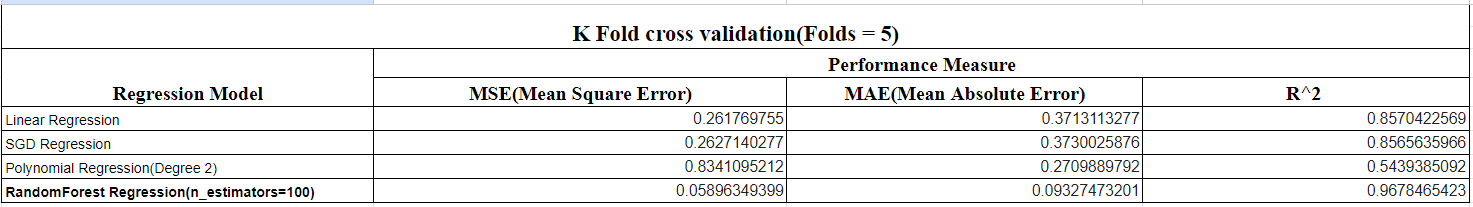
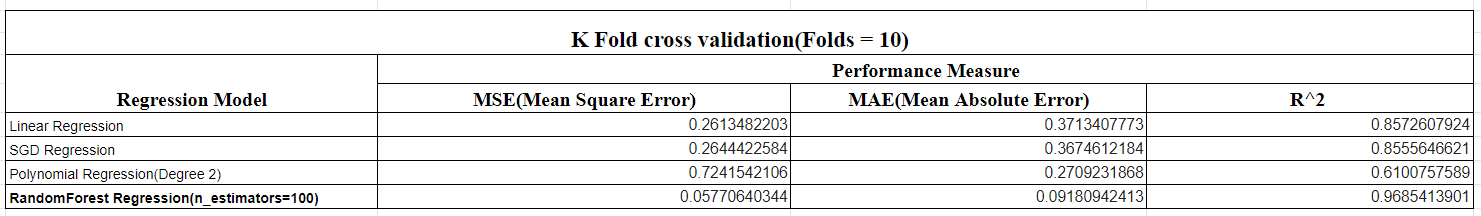
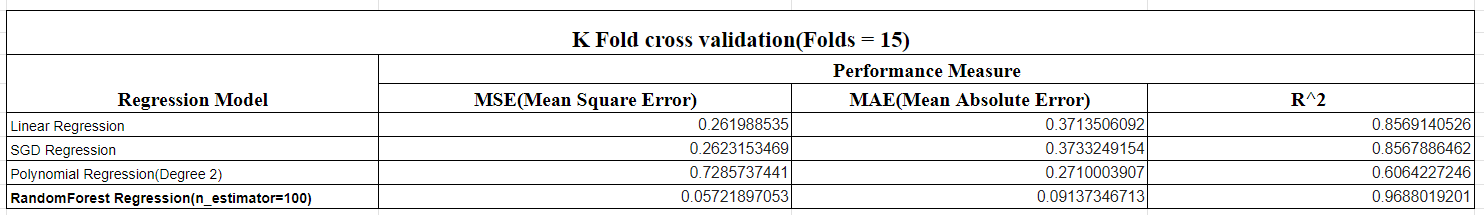
Comparition using Bar graphs: - 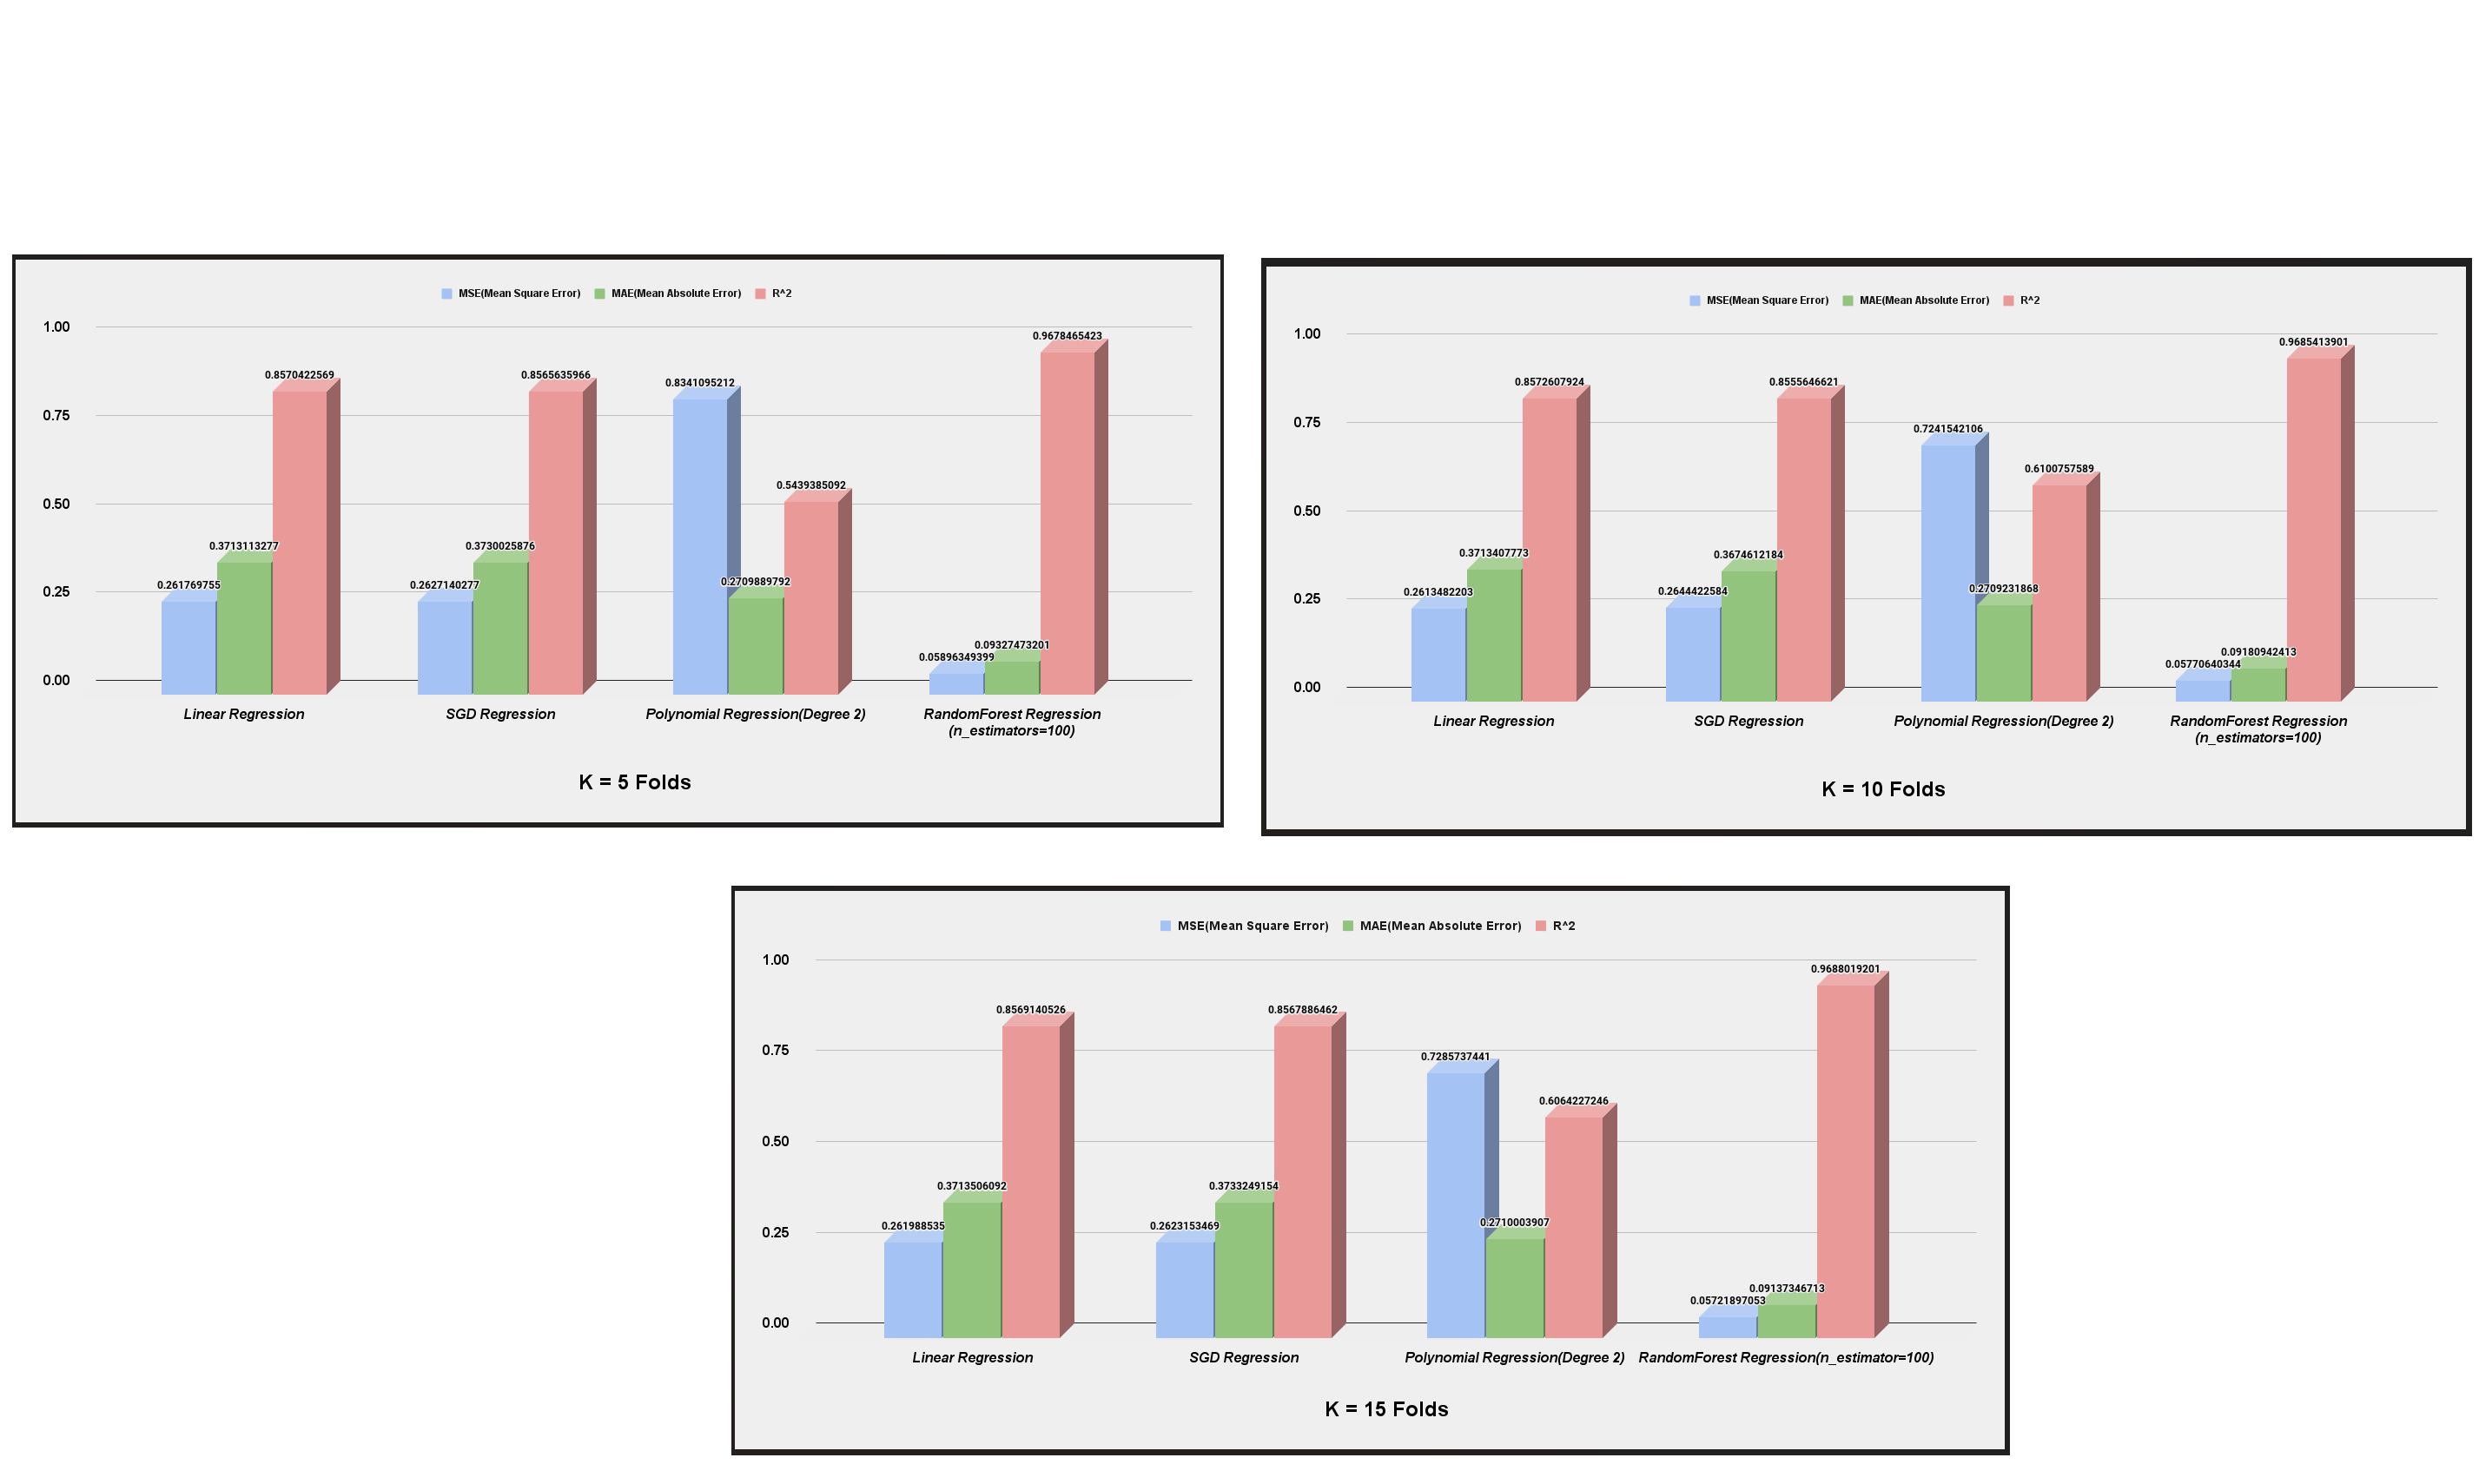

# **Imports**

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

In [ ]:
!unzip /content/drive/MyDrive/Data_Mining/archive__1.zip -d /content/drive/MyDrive/Data_Mining/

Archive:  /content/drive/MyDrive/Data_Mining/archive__1.zip
  inflating: /content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv  


# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [ ]:
df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv")

<ipython-input-6-041004de04d7>:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv")


In [ ]:
df_main.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

# **Data Visualisation**

## **Box plot**

In [ ]:
df_box = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv')

In [ ]:
df_box.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number', 'Total_time_hours',
       'Charging_time_hours'],
      dtype='object')

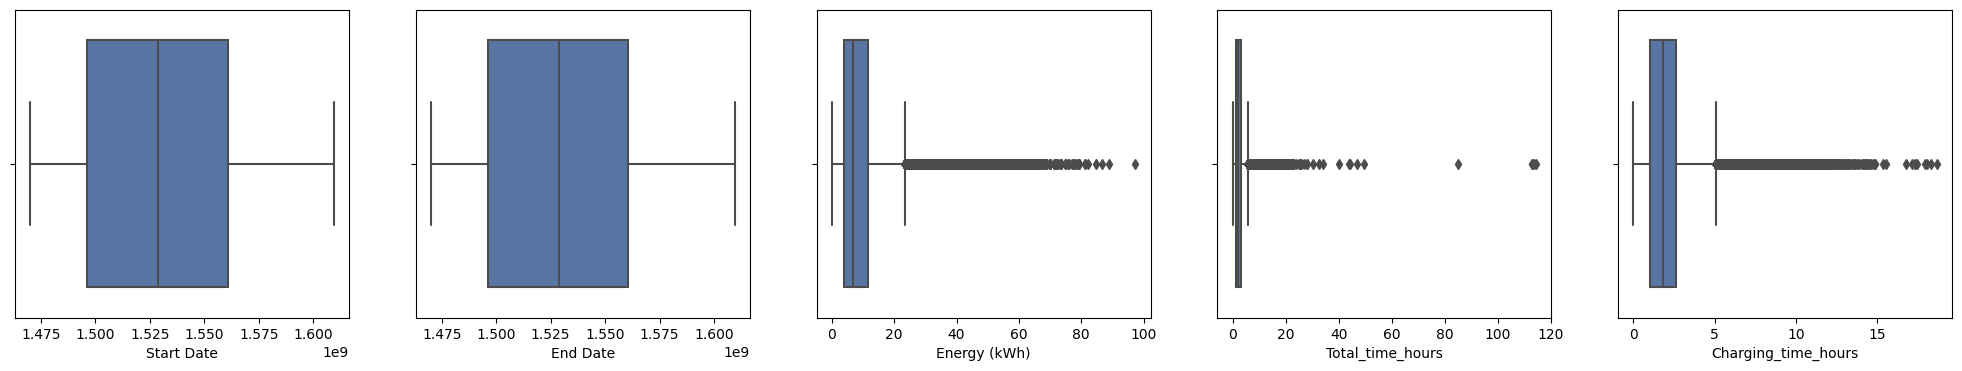

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25,4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(['Start Date', 'End Date','Energy (kWh)',
       'Total_time_hours', 'Charging_time_hours' ]):
    sns.boxplot(x=df_box[col], ax=ax[axid])

## **Scatter plot**

<Axes: xlabel='Energy (kWh)', ylabel='Charging_time_hours'>

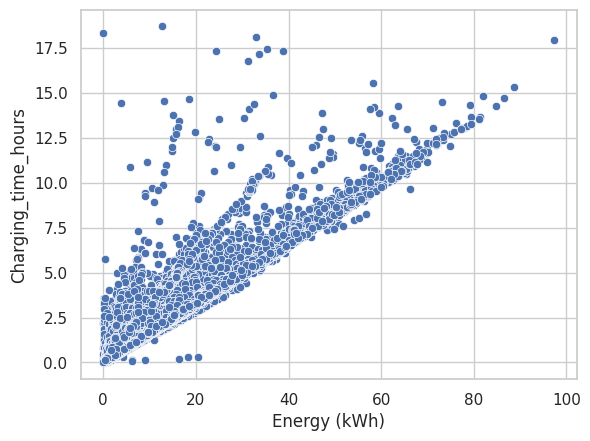

In [ ]:
sns.scatterplot(x = df_box['Energy (kWh)'], y = df_box['Charging_time_hours'])

<Axes: xlabel='Total_time_hours', ylabel='Charging_time_hours'>

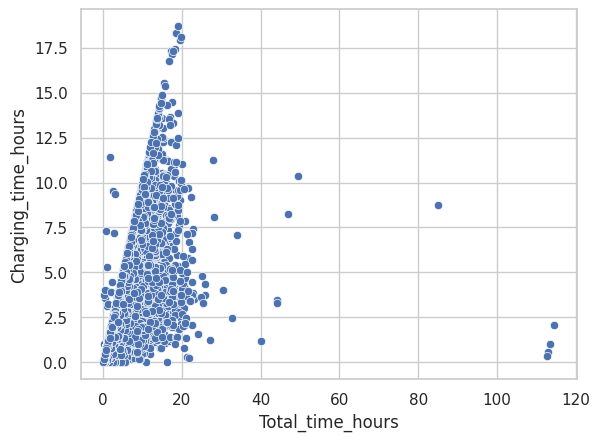

In [ ]:
sns.scatterplot(x = df_box['Total_time_hours'], y = df_box['Charging_time_hours'])

## **Heatmap**

<Axes: >

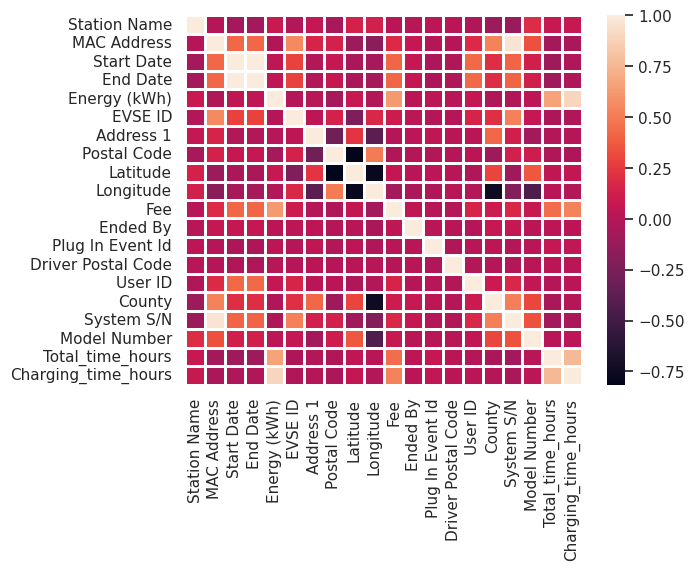

In [ ]:
sns.heatmap(data=df_box.corr(), lw = 1)

## ***Dropping columns based on Domain knowledge and heatmap***

In [ ]:
columns_to_drop=['GHG Savings (kg)','Gasoline Savings (gallons)','Currency','Country','Org Name','Plug Type','Port Type','Port Number']
df_main.drop(columns=columns_to_drop, inplace=True)

# **Remove Entries having nan value**

In [ ]:
data_cleaned = df_main.dropna()

In [ ]:
data_cleaned.isnull().sum()

Station Name                       0
MAC Address                        0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Latitude                           0
Longitude                          0
Fee                                0
Ended By                           0
Plug In Event Id                   0
Driver Postal Code                 0
User ID                            0
County                             0
System S/N                         0
Model Number                       0
dtype: int64

In [ ]:
data_cleaned.shape

(169446, 25)

# **Data Preprocessing**

## **Converting *Start date, Start time Zone,End date,End time Zone* to numeric**

In [ ]:
selected_columns = ["Start Date", "Start Time Zone"]

# Create a new DataFrame with the selected columns
dfa = data_cleaned[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfa.iterrows():
    if row["Start Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["Start Date"])
    else:
        converted_dt = datetime.strptime(row["Start Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["Start Date"])
    numeric_values.append(numeric_value)

dfa["ConvertedDateTime"] = converted_date_times
dfa["NumericValue"] = numeric_values

print(dfa)

data_cleaned["Start Date"] = dfa["NumericValue"]

              Start Date Start Time Zone          ConvertedDateTime  \
78948      8/1/2016 5:21             PDT        2016-08-01 05:21:00   
78949      8/1/2016 6:01             PDT        2016-08-01 06:01:00   
78950      8/1/2016 6:03             PDT        2016-08-01 06:03:00   
78951      8/1/2016 6:10             PDT        2016-08-01 06:10:00   
78952      8/1/2016 6:13             PDT        2016-08-01 06:13:00   
...                  ...             ...                        ...   
259409  12/31/2020 15:51             PST  2020-12-31 15:51:00-08:00   
259411  12/31/2020 16:48             PST  2020-12-31 16:48:00-08:00   
259412  12/31/2020 17:28             PST  2020-12-31 17:28:00-08:00   
259413  12/31/2020 17:49             PST  2020-12-31 17:49:00-08:00   
259414  12/31/2020 18:19             PST  2020-12-31 18:19:00-08:00   

        NumericValue  
78948   1.470029e+09  
78949   1.470031e+09  
78950   1.470031e+09  
78951   1.470032e+09  
78952   1.470032e+09  
...      

<ipython-input-10-5fe1e3c85d9c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["ConvertedDateTime"] = converted_date_times
<ipython-input-10-5fe1e3c85d9c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["NumericValue"] = numeric_values
<ipython-input-10-5fe1e3c85d9c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
print("Original dataset:")
print(data_cleaned)

# Function to check if a value is a valid date and time format
def is_valid_datetime(value):
    try:
        datetime.strptime(value, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

# Filter out rows with invalid date and time values
data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]

# Print the dataset after dropping invalid rows
# print("\nDataset after dropping invalid rows:")
# print(df_main)

Original dataset:
                       Station Name          MAC Address    Start Date  \
78948   PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  1.470029e+09   
78949   PALO ALTO CA / CAMBRIDGE #2  0024:B100:0002:13B7  1.470031e+09   
78950   PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  1.470031e+09   
78951    PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  1.470032e+09   
78952        PALO ALTO CA / HIGH #1  0024:B100:0002:10FE  1.470032e+09   
...                             ...                  ...           ...   
259409  PALO ALTO CA / CAMBRIDGE #5  0024:B100:0002:9B7F  1.609430e+09   
259411    PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412        PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413    PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414  PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

       Start Time Zone          End Date End Time Zone  \
78948              PDT     8/1/2016

<ipython-input-11-80ddd35c4a75>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]


In [ ]:
selected_columns = ['End Date', 'End Time Zone']

# Create a new DataFrame with the selected columns
dfb = data_cleaned[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfb.iterrows():
    if row["End Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["End Date"])
    else:
        converted_dt = datetime.strptime(row["End Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["End Date"])
    numeric_values.append(numeric_value)

dfb["ConvertedDateTime"] = converted_date_times
dfb["NumericValue"] = numeric_values

print(dfb)

data_cleaned["End Date"] = dfa["NumericValue"]

                End Date End Time Zone          ConvertedDateTime  \
78948      8/1/2016 6:49           PDT        2016-08-01 06:49:00   
78949     8/1/2016 10:58           PDT        2016-08-01 10:58:00   
78950      8/1/2016 9:15           PDT        2016-08-01 09:15:00   
78951      8/1/2016 8:54           PDT        2016-08-01 08:54:00   
78952      8/1/2016 9:33           PDT        2016-08-01 09:33:00   
...                  ...           ...                        ...   
259409  12/31/2020 17:30           PST  2020-12-31 17:30:00-08:00   
259411  12/31/2020 20:31           PST  2020-12-31 20:31:00-08:00   
259412    1/1/2021 10:56           PST  2021-01-01 10:56:00-08:00   
259413  12/31/2020 21:55           PST  2020-12-31 21:55:00-08:00   
259414  12/31/2020 19:01           PST  2020-12-31 19:01:00-08:00   

        NumericValue  
78948   1.470034e+09  
78949   1.470049e+09  
78950   1.470043e+09  
78951   1.470042e+09  
78952   1.470044e+09  
...              ...  
259409  1.

<ipython-input-13-89e9d7c67890>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["ConvertedDateTime"] = converted_date_times
<ipython-input-13-89e9d7c67890>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["NumericValue"] = numeric_values


## **Dropping Transacting date**

**Reason**: - Transaction Date and End date are having same values mostly so it doesn't provide additional information, therefore dropping it for reducting computational complexity

In [ ]:
columns_to_drop=['Start Time Zone','End Time Zone','Transaction Date (Pacific Time)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

## **Converting *Total time, charging time*(having format HH:MM:SS) to hours**

In [ ]:
def time_to_numeric(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)

data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)

In [ ]:
columns_to_drop=['Total Duration (hh:mm:ss)','Charging Time (hh:mm:ss)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

# **Visualising Data after Data preprocessing**

In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,City,State/Province,Postal Code,...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
78948,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,1.470029e+09,1.470029e+09,4.464626,109701.0,400 Cambridge Ave,Palo Alto,California,94306,...,0.0,Plug Out at Vehicle,1665,94587.0,523487,Santa Clara County,1.427410e+11,CT4020-HD-GW,1.466111,1.423889
78949,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,1.470031e+09,1.470031e+09,7.501231,107427.0,400 Cambridge Ave,Palo Alto,California,94306,...,0.0,Plug Out at Vehicle,1771,95030.0,141845,Santa Clara County,1.428410e+11,CT4020-HD-GW,4.940833,2.517778
78950,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,1.470031e+09,1.470031e+09,10.891753,109701.0,400 Cambridge Ave,Palo Alto,California,94306,...,0.0,Plug Out at Vehicle,1666,80525.0,203603,Santa Clara County,1.427410e+11,CT4020-HD-GW,3.204722,3.188333
78951,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,1.470032e+09,1.470032e+09,6.968250,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,0.0,Plug Out at Vehicle,2093,94539.0,126575,Santa Clara County,1.427410e+11,CT4020-HD-GW,2.740278,2.430278
78952,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,1.470032e+09,1.470032e+09,17.938757,104339.0,528 High St,Palo Alto,California,94301,...,0.0,Plug Out at Vehicle,3112,94024.0,191743,Santa Clara County,1.422410e+11,CT4020-HD-GW,3.323333,3.320833


## **Handling Categorical features**

### **Label Encode ------> Categorical Features**
**Categorical Features = ['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province', 'Ended By', 'County', 'Model Number']**

In [ ]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province',
       'Ended By', 'User ID', 'County', 'Model Number'],
      dtype='object')


In [ ]:
categorical_columns = [col for col in categorical_columns if col != 'User ID']

In [ ]:
print(categorical_columns)

['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province', 'Ended By', 'County', 'Model Number']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
  le = LabelEncoder()
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
  label_encoders[column] = le

print(data_cleaned)

        Station Name  MAC Address    Start Date      End Date  Energy (kWh)  \
78948              7           22  1.470029e+09  1.470029e+09      4.464626   
78949              8           24  1.470031e+09  1.470031e+09      7.501231   
78950              7           22  1.470031e+09  1.470031e+09     10.891753   
78951             13           23  1.470032e+09  1.470032e+09      6.968250   
78952             14           17  1.470032e+09  1.470032e+09     17.938757   
...              ...          ...           ...           ...           ...   
259409            11           36  1.609430e+09  1.609430e+09      2.535000   
259411            42           27  1.609433e+09  1.609433e+09     12.744000   
259412            21           57  1.609436e+09  1.609436e+09     29.665000   
259413            42           27  1.609437e+09  1.609437e+09     11.976000   
259414            10           40  1.609439e+09  1.609439e+09      1.571000   

          EVSE ID  Address 1  City  State/Province 

# **Dropping *City, State/Province***

**Reason**: - Feature has single value

In [ ]:
data_cleaned.drop(['City'],axis=1,inplace = True)
data_cleaned.drop(['State/Province'],axis=1,inplace=True)

# **Visualising data after *Label encoding***

In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,Postal Code,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
78948,7,22,1.470029e+09,1.470029e+09,4.464626,109701.0,6,94306,37.426155,-122.146065,0.0,8,1665,94587.0,523487,1,1.427410e+11,6,1.466111,1.423889
78949,8,24,1.470031e+09,1.470031e+09,7.501231,107427.0,6,94306,37.426182,-122.146065,0.0,8,1771,95030.0,141845,1,1.428410e+11,6,4.940833,2.517778
78950,7,22,1.470031e+09,1.470031e+09,10.891753,109701.0,6,94306,37.426155,-122.146065,0.0,8,1666,80525.0,203603,1,1.427410e+11,6,3.204722,3.188333
78951,13,23,1.470032e+09,1.470032e+09,6.968250,109785.0,1,94301,37.444359,-122.159904,0.0,8,2093,94539.0,126575,1,1.427410e+11,6,2.740278,2.430278
78952,14,17,1.470032e+09,1.470032e+09,17.938757,104339.0,11,94301,37.443558,-122.162849,0.0,8,3112,94024.0,191743,1,1.422410e+11,6,3.323333,3.320833


# **Saving Processed dataframe to google drive in csv format**

**Reason**: - Preprocessing data is a time consuming process, therefore it is better to save the processed file for later use which saves lots of computation power and also preprocessing time

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv'

data_cleaned.to_csv(path,index=False)

# **Regression Analysis On EV Charging Station dataset**

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv')

In [ ]:
data_df = data_cleaned.drop(['Charging_time_hours'],axis=1)

## **Splitting data into training, testing set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Charging_time_hours'], random_state=42, test_size=0.20)

## **Normalising data using sklearn's *StandardScaler* method**

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((135526, 19), (33882, 19))

## **Linear Regression**

In [ ]:
model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train_scaled, y_train)

predicted_values_linear_reg = model_linear_regression.predict(X_test_scaled)

print("Coefficients of liner regression:", model_linear_regression.coef_)
print("Intercept of liner regression:", model_linear_regression.intercept_)

linear_mse = mean_squared_error(y_test, predicted_values_linear_reg)
linear_mae = mean_absolute_error(y_test, predicted_values_linear_reg)
linear_r2 = r2_score(y_test, predicted_values_linear_reg)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression R-squared:", linear_r2)

Coefficients of liner regression: [-0.01125326  0.09586783 -0.01049904 -0.01049904  1.00058334 -0.0245372
 -0.04252808  0.03055208  0.01257465  0.01167461 -0.07173291 -0.00714017
  0.00298375  0.01552216 -0.01108705  0.07561871 -0.09337022 -0.00953799
  0.39572436]
Intercept of liner regression: 1.96468608729439
Linear Regression MSE: 0.2500244027715469
Linear Regression MAE: 0.37457871015782024
Linear Regression R-squared: 0.8655376625160813


### **K fold Cross Validation on Regression**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

size_scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled_cross = size_scaler.transform(X)

In [ ]:
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model, X_train_scaled_cross, y, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.2671929179323744
std_mse : 0.05295095767318773


## **SGDRegression (Stochastic Gradient Descent)**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

model_sgdregression.fit(X_train_scaled, y_train)

predicted_values_sgd_regression = model_sgdregression.predict(X_test_scaled)

print("Coefficients of sdg regression:", model_sgdregression.coef_)
print("Intercept of sdg regression:", model_sgdregression.intercept_)

sgd_mse = mean_squared_error(y_test, predicted_values_sgd_regression)
sgd_mae = mean_absolute_error(y_test, predicted_values_sgd_regression)
sgd_r2 = r2_score(y_test, predicted_values_sgd_regression)

print("SGD Regression MSE:", sgd_mse)
print("SGD Regression MAE:", sgd_mae)
print("SGD Regression R-squared:", sgd_r2)

Coefficients of sdg regression: [-0.00949933  0.09055095 -0.0131234  -0.0131234   1.00999657 -0.02114983
 -0.04669521  0.02982999  0.01025199  0.00519987 -0.07485407 -0.0074524
  0.00237312  0.0143155  -0.01352669  0.07659481 -0.09090635 -0.0057149
  0.39098086]
Intercept of sdg regression: [1.96337166]
SGD Regression MSE: 0.25055285639463104
SGD Regression MAE: 0.3748570130196398
SGD Regression R-squared: 0.8652534618195731


### **k Fold Cross Validation On SDGRegression(Number of folds =5)**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model_sgdregression, X_train_scaled_cross, y, cv=20, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.2635245064084825
std_mse : 0.07482219283737619


## **Polynomial Regression(Degree = 2)**

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y_train)

# Predict using the trained model
predicted_values_poly = model.predict(X_test_poly)

poly_mse = mean_squared_error(y_test, predicted_values_poly)
poly_mae = mean_absolute_error(y_test, predicted_values_poly)
poly_r2 = r2_score(y_test, predicted_values_poly)

print("SGD Regression MSE:", poly_mse)
print("SGD Regression MAE:", poly_mae)
print("SGD Regression R-squared:", poly_r2)

SGD Regression MSE: 0.17080498089039448
SGD Regression MAE: 0.2704693797078527
SGD Regression R-squared: 0.9081416184587238


## **Random Forest Regression(n_estimators = 100)**

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
print("RF Regression MSE:", rf_mse)
print("RF Regression MAE:", rf_mae)
print("RF Regression R-squared:", rf_r2)

RF Regression MSE: 0.05925196098898543
RF Regression MAE: 0.0936961212607153
RF Regression R-squared: 0.9681344817275107


### **K fold cross validation On RFRegression(Fold = 5)**

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(rf_regressor, X_train_scaled_cross, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse_rf = np.mean(mse_scores)
std_mse_rf = np.std(mse_scores)

print(f'mean_mse : {mean_mse_rf}')
print(f'std_mse : {std_mse_rf}')

mean_mse : 0.2836670997857023
std_mse : 0.1426071629791682


## **K fold cross validation on 4 regression models**
## 1) Linear regression
## 2) SGD regression
## 3) Polynomial regression
## 4) Random forest regression

### **Folds = 5**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

# Define the number of folds for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Linear Regression
linear_mse_scores = []
linear_mae_scores = []
linear_r2_scores = []

# SGD Regression
sgd_mse_scores = []
sgd_mae_scores = []
sgd_r2_scores = []

# Polynomial Regression (degree=2)
poly_mse_scores = []
poly_mae_scores = []
poly_r2_scores = []

# Random Forest Regression
rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    size_scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = size_scaler.transform(X_train)
    X_test = size_scaler.transform(X_test)

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)
    linear_mse = mean_squared_error(y_test, linear_pred)
    linear_mae = mean_absolute_error(y_test, linear_pred)
    linear_r2 = r2_score(y_test, linear_pred)
    linear_mse_scores.append(linear_mse)
    linear_mae_scores.append(linear_mae)
    linear_r2_scores.append(linear_r2)

    # SGD Regression
    sgd_reg = SGDRegressor()
    sgd_reg.fit(X_train, y_train)
    sgd_pred = sgd_reg.predict(X_test)
    sgd_mse = mean_squared_error(y_test, sgd_pred)
    sgd_mae = mean_absolute_error(y_test, sgd_pred)
    sgd_r2 = r2_score(y_test, sgd_pred)
    sgd_mse_scores.append(sgd_mse)
    sgd_mae_scores.append(sgd_mae)
    sgd_r2_scores.append(sgd_r2)

    # Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    poly_pred = poly_reg.predict(X_test_poly)
    poly_mse = mean_squared_error(y_test, poly_pred)
    poly_mae = mean_absolute_error(y_test, poly_pred)
    poly_r2 = r2_score(y_test, poly_pred)
    poly_mse_scores.append(poly_mse)
    poly_mae_scores.append(poly_mae)
    poly_r2_scores.append(poly_r2)

    # Random Forest Regression
    # rf_reg = RandomForestRegressor()
    # rf_reg.fit(X_train, y_train)
    # rf_pred = rf_reg.predict(X_test)
    # rf_mse = mean_squared_error(y_test, rf_pred)
    # rf_mae = mean_absolute_error(y_test, rf_pred)
    # rf_r2 = r2_score(y_test, rf_pred)
    # rf_mse_scores.append(rf_mse)
    # rf_mae_scores.append(rf_mae)
    # rf_r2_scores.append(rf_r2)

# Calculate and print the mean scores for each algorithm
print("Linear Regression:")
print(f"MSE: {np.mean(linear_mse_scores)}")
print(f"MAE: {np.mean(linear_mae_scores)}")
print(f"R^2: {np.mean(linear_r2_scores)}")

print("\nSGD Regression:")
print(f"MSE: {np.mean(sgd_mse_scores)}")
print(f"MAE: {np.mean(sgd_mae_scores)}")
print(f"R^2: {np.mean(sgd_r2_scores)}")

print("\nPolynomial Regression:")
print(f"MSE: {np.mean(poly_mse_scores)}")
print(f"MAE: {np.mean(poly_mae_scores)}")
print(f"R^2: {np.mean(poly_r2_scores)}")

# print("\nRandom Forest Regression:")
# print(f"MSE: {np.mean(rf_mse_scores)}")
# print(f"MAE: {np.mean(rf_mae_scores)}")
# print(f"R^2: {np.mean(rf_r2_scores)}")

Linear Regression:
MSE: 0.2617697550245349
MAE: 0.37131132768850666
R^2: 0.8570422568965179

SGD Regression:
MSE: 0.2627140277408366
MAE: 0.37300258764579086
R^2: 0.856563596619791

Polynomial Regression:
MSE: 0.8341095212362397
MAE: 0.2709889791705179
R^2: 0.5439385091603371


### **Folds = 10**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

# Define the number of folds for k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Linear Regression
linear_mse_scores = []
linear_mae_scores = []
linear_r2_scores = []

# SGD Regression
sgd_mse_scores = []
sgd_mae_scores = []
sgd_r2_scores = []

# Polynomial Regression (degree=2)
poly_mse_scores = []
poly_mae_scores = []
poly_r2_scores = []

# Random Forest Regression
rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    size_scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = size_scaler.transform(X_train)
    X_test = size_scaler.transform(X_test)

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)
    linear_mse = mean_squared_error(y_test, linear_pred)
    linear_mae = mean_absolute_error(y_test, linear_pred)
    linear_r2 = r2_score(y_test, linear_pred)
    linear_mse_scores.append(linear_mse)
    linear_mae_scores.append(linear_mae)
    linear_r2_scores.append(linear_r2)

    # SGD Regression
    sgd_reg = SGDRegressor()
    sgd_reg.fit(X_train, y_train)
    sgd_pred = sgd_reg.predict(X_test)
    sgd_mse = mean_squared_error(y_test, sgd_pred)
    sgd_mae = mean_absolute_error(y_test, sgd_pred)
    sgd_r2 = r2_score(y_test, sgd_pred)
    sgd_mse_scores.append(sgd_mse)
    sgd_mae_scores.append(sgd_mae)
    sgd_r2_scores.append(sgd_r2)

    # Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    poly_pred = poly_reg.predict(X_test_poly)
    poly_mse = mean_squared_error(y_test, poly_pred)
    poly_mae = mean_absolute_error(y_test, poly_pred)
    poly_r2 = r2_score(y_test, poly_pred)
    poly_mse_scores.append(poly_mse)
    poly_mae_scores.append(poly_mae)
    poly_r2_scores.append(poly_r2)

    # Random Forest Regression
    # rf_reg = RandomForestRegressor()
    # rf_reg.fit(X_train, y_train)
    # rf_pred = rf_reg.predict(X_test)
    # rf_mse = mean_squared_error(y_test, rf_pred)
    # rf_mae = mean_absolute_error(y_test, rf_pred)
    # rf_r2 = r2_score(y_test, rf_pred)
    # rf_mse_scores.append(rf_mse)
    # rf_mae_scores.append(rf_mae)
    # rf_r2_scores.append(rf_r2)

# Calculate and print the mean scores for each algorithm
print("Linear Regression:")
print(f"MSE: {np.mean(linear_mse_scores)}")
print(f"MAE: {np.mean(linear_mae_scores)}")
print(f"R^2: {np.mean(linear_r2_scores)}")

print("\nSGD Regression:")
print(f"MSE: {np.mean(sgd_mse_scores)}")
print(f"MAE: {np.mean(sgd_mae_scores)}")
print(f"R^2: {np.mean(sgd_r2_scores)}")

print("\nPolynomial Regression:")
print(f"MSE: {np.mean(poly_mse_scores)}")
print(f"MAE: {np.mean(poly_mae_scores)}")
print(f"R^2: {np.mean(poly_r2_scores)}")

# print("\nRandom Forest Regression:")
# print(f"MSE: {np.mean(rf_mse_scores)}")
# print(f"MAE: {np.mean(rf_mae_scores)}")
# print(f"R^2: {np.mean(rf_r2_scores)}")

Linear Regression:
MSE: 0.261348220260417
MAE: 0.3713407773087064
R^2: 0.8572607924016202

SGD Regression:
MSE: 0.26444225839457774
MAE: 0.3674612184231612
R^2: 0.8555646621059735

Polynomial Regression:
MSE: 0.7241542105722486
MAE: 0.2709231868034051
R^2: 0.6100757589257062


### **Folds = 15**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

# Define the number of folds for k-fold cross-validation
k = 15
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Linear Regression
linear_mse_scores = []
linear_mae_scores = []
linear_r2_scores = []

# SGD Regression
sgd_mse_scores = []
sgd_mae_scores = []
sgd_r2_scores = []

# Polynomial Regression (degree=2)
poly_mse_scores = []
poly_mae_scores = []
poly_r2_scores = []

# Random Forest Regression
rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    size_scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = size_scaler.transform(X_train)
    X_test = size_scaler.transform(X_test)

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)
    linear_mse = mean_squared_error(y_test, linear_pred)
    linear_mae = mean_absolute_error(y_test, linear_pred)
    linear_r2 = r2_score(y_test, linear_pred)
    linear_mse_scores.append(linear_mse)
    linear_mae_scores.append(linear_mae)
    linear_r2_scores.append(linear_r2)

    # SGD Regression
    sgd_reg = SGDRegressor()
    sgd_reg.fit(X_train, y_train)
    sgd_pred = sgd_reg.predict(X_test)
    sgd_mse = mean_squared_error(y_test, sgd_pred)
    sgd_mae = mean_absolute_error(y_test, sgd_pred)
    sgd_r2 = r2_score(y_test, sgd_pred)
    sgd_mse_scores.append(sgd_mse)
    sgd_mae_scores.append(sgd_mae)
    sgd_r2_scores.append(sgd_r2)

    # Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    poly_pred = poly_reg.predict(X_test_poly)
    poly_mse = mean_squared_error(y_test, poly_pred)
    poly_mae = mean_absolute_error(y_test, poly_pred)
    poly_r2 = r2_score(y_test, poly_pred)
    poly_mse_scores.append(poly_mse)
    poly_mae_scores.append(poly_mae)
    poly_r2_scores.append(poly_r2)

    # Random Forest Regression
    # rf_reg = RandomForestRegressor()
    # rf_reg.fit(X_train, y_train)
    # rf_pred = rf_reg.predict(X_test)
    # rf_mse = mean_squared_error(y_test, rf_pred)
    # rf_mae = mean_absolute_error(y_test, rf_pred)
    # rf_r2 = r2_score(y_test, rf_pred)
    # rf_mse_scores.append(rf_mse)
    # rf_mae_scores.append(rf_mae)
    # rf_r2_scores.append(rf_r2)

# Calculate and print the mean scores for each algorithm
print("Linear Regression:")
print(f"MSE: {np.mean(linear_mse_scores)}")
print(f"MAE: {np.mean(linear_mae_scores)}")
print(f"R^2: {np.mean(linear_r2_scores)}")

print("\nSGD Regression:")
print(f"MSE: {np.mean(sgd_mse_scores)}")
print(f"MAE: {np.mean(sgd_mae_scores)}")
print(f"R^2: {np.mean(sgd_r2_scores)}")

print("\nPolynomial Regression:")
print(f"MSE: {np.mean(poly_mse_scores)}")
print(f"MAE: {np.mean(poly_mae_scores)}")
print(f"R^2: {np.mean(poly_r2_scores)}")

# print("\nRandom Forest Regression:")
# print(f"MSE: {np.mean(rf_mse_scores)}")
# print(f"MAE: {np.mean(rf_mae_scores)}")
# print(f"R^2: {np.mean(rf_r2_scores)}")

Linear Regression:
MSE: 0.26198853503235436
MAE: 0.3713506091866827
R^2: 0.8569140526160162

SGD Regression:
MSE: 0.26231534691158015
MAE: 0.3733249154315449
R^2: 0.85678864617336

Polynomial Regression:
MSE: 0.7285737440529251
MAE: 0.271000390745778
R^2: 0.6064227246019203


### **K fold on Random Forest regression**

### **Folds = 5**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

# Define the number of folds for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Random Forest Regression
rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    size_scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = size_scaler.transform(X_train)
    X_test = size_scaler.transform(X_test)

    # Random Forest Regression
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mse_scores.append(rf_mse)
    rf_mae_scores.append(rf_mae)
    rf_r2_scores.append(rf_r2)

print("\nRandom Forest Regression:")
print(f"MSE: {np.mean(rf_mse_scores)}")
print(f"MAE: {np.mean(rf_mae_scores)}")
print(f"R^2: {np.mean(rf_r2_scores)}")


Random Forest Regression:
MSE: 0.058963493992441884
MAE: 0.09327473201348613
R^2: 0.9678465422968975


### **Folds = 10**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

# Define the number of folds for k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Random Forest Regression
rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    size_scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = size_scaler.transform(X_train)
    X_test = size_scaler.transform(X_test)

    # Random Forest Regression
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mse_scores.append(rf_mse)
    rf_mae_scores.append(rf_mae)
    rf_r2_scores.append(rf_r2)



print("\nRandom Forest Regression:")
print(f"MSE: {np.mean(rf_mse_scores)}")
print(f"MAE: {np.mean(rf_mae_scores)}")
print(f"R^2: {np.mean(rf_r2_scores)}")


Random Forest Regression:
MSE: 0.0577064034429723
MAE: 0.09180942412962623
R^2: 0.9685413900702822


### **Folds = 15**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

# Define the number of folds for k-fold cross-validation
k = 15
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Random Forest Regression
rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    size_scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = size_scaler.transform(X_train)
    X_test = size_scaler.transform(X_test)

    # Random Forest Regression
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mse_scores.append(rf_mse)
    rf_mae_scores.append(rf_mae)
    rf_r2_scores.append(rf_r2)



print("\nRandom Forest Regression:")
print(f"MSE: {np.mean(rf_mse_scores)}")
print(f"MAE: {np.mean(rf_mae_scores)}")
print(f"R^2: {np.mean(rf_r2_scores)}")


Random Forest Regression:
MSE: 0.05721897052613441
MAE: 0.09137346712888611
R^2: 0.9688019200889818


## **GradientBoosting**

### ***N_estimator = 100***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv')

data_df = data_cleaned.drop(['Charging_time_hours'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Charging_time_hours'], random_state=42, test_size=0.20)

size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = size_scaler.transform(X_train)
X_test = size_scaler.transform(X_test)

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R^2):", r2_gb)

Mean Squared Error (MSE): 0.0982799542938673
Mean Absolute Error (MAE): 0.1651044611369607
R-squared (R^2): 0.9471453496711644


### ***N_estimator = 150***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

gb_regressor = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R^2):", r2_gb)

Mean Squared Error (MSE): 0.09410386560406432
Mean Absolute Error (MAE): 0.16123438986544936
R-squared (R^2): 0.9493912370347436


### ***N_estimator = 200***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score



gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R^2):", r2_gb)

Mean Squared Error (MSE): 0.09074420465370156
Mean Absolute Error (MAE): 0.15706451318311368
R-squared (R^2): 0.9511980521277167


# **GridSearch for hyperparameter tuning**

## ***Prepare dataset***

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv')

data_df = data_cleaned.drop(['Charging_time_hours'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Charging_time_hours'], random_state=42, test_size=0.20)

# size_scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = size_scaler.transform(X_train)
# X_test = size_scaler.transform(X_test)

## ***Linear regression***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Create a Linear Regression model
lr = LinearRegression()

# Define a dictionary of hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept (bias)
    'normalize': [True, False],       # Whether to normalize the features
    # You can add more hyperparameters and their values here
}

# Define the scoring metric for Grid Search (e.g., Mean Squared Error)
scoring = make_scorer(mean_squared_error)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from the Grid Search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best MSE on Test Data:", mse)